In [1]:
import numpy
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline



In [2]:
from pynvml import *

print("GPU NAME")
print(torch.cuda.get_device_name())

print('Memory Usage:')
nvmlInit()
h = nvmlDeviceGetHandleByIndex(0)
info = nvmlDeviceGetMemoryInfo(h)

print("TOTAL MEMORY", round(info.total//1024**3, 3))
print("FREE MEMORY", round(info.free//1024**3, 3))


GPU NAME
Tesla K80
Memory Usage:
TOTAL MEMORY 11
FREE MEMORY 11


In [5]:
is_cuda=False
if torch.cuda.is_available():
    is_cuda = True

## GETTING MNIST DATASET

In [ ]:
transformation = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

train_dataset = datasets.MNIST('data/',train=True,transform=transformation,download=True)
test_dataset = datasets.MNIST('data/',train=False,transform=transformation,download=True)

train_loader = torch.utils.data.DataLoader(train_dataset,batch_size=32,shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset,batch_size=32,shuffle=True)


In [8]:
sample_data = next(iter(train_loader))


In [12]:
def plot_image(image):
  image = image.numpy()[0]
  mean = 0.1307
  std = 0.3081
  image = ((mean * image) + std)
  plt.imshow(image,cmap='gray')



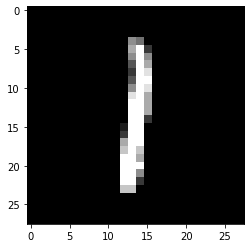

In [14]:
plot_image(sample_data[0][8])


In [ ]:
class Net(nn.module):

  def __init__(self, input)